In [11]:
import pandas as pd
import textstat
import matplotlib.pyplot as plt

Readability Formulas: These are mathematical formulas that use various textual characteristics to predict the grade level or reading ability necessary to comprehend a text.

* Flesch-Kincaid Grade Level and Reading Ease: Uses word length and sentence length to predict grade level and ease of reading.

* Gunning Fog Index: Uses sentence length and the proportion of complex words (words with three or more syllables).

* SMOG (Simple Measure of Gobbledygook): Focuses on words with three or more syllables to determine the years of education a reader would need to understand the text.

* Coleman-Liau Index: Based on characters per word and sentences per 100 words.

* Automated Readability Index (ARI): Uses characters per word and words per sentence.

In [8]:
df = pd.read_csv('../data/df_presconf.csv')
df.shape

(1276, 9)

In [6]:
def calculate_readability_metrics(text):
    fk_grade_level = textstat.flesch_kincaid_grade(text)
    fk_reading_ease = textstat.flesch_reading_ease(text)
    gunning_fog = textstat.gunning_fog(text)
    smog = textstat.smog_index(text)
    coleman_liau = textstat.coleman_liau_index(text)
    ari = textstat.automated_readability_index(text)
    
    return {
        "Flesch-Kincaid Grade Level": fk_grade_level,
        "Flesch-Kincaid Reading Ease": fk_reading_ease,
        "Gunning Fog Index": gunning_fog,
        "SMOG Index": smog,
        "Coleman-Liau Index": coleman_liau,
        "Automated Readability Index (ARI)": ari
    }



In [7]:
df.iloc[1,7]

'UNIDENTIFIED SPEAKER.  Mr. Chairman, tomorrow we’re going to get a pretty weak first-quarter \r\nGDP number.  Your own projections  for the year have been downgraded in this meeting.  How—\r\nfirst of all, what do you see as the causes of the weak growth to start the year, even with \r\nmonetary easing, even with payr oll tax cuts?  And what’s behi nd this weaker forecast for 2011 \r\nGDP?  \r\nCHAIRMAN BERNANKE.  You’re correct.  We haven’t seen the GDP number yet.  But \r\nwe, like most private-sector forecasters, are e xpecting a relatively weak  number for the first \r\nquarter, maybe something a little und er 2 percent.  Most of the f actors that account for the slower \r\ngrowth in the first quarter appear to us to be tr ansitory.  They include things like, for example, \r\nlower defense spending than was anticipated, wh ich will presumably be made up in a later \r\nquarter; weaker exports—and given the growth in the global economy, we expect to see that pick \r\nup again; and o

In [6]:
metrics = calculate_readability_metrics(df.iloc[1,7])

for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

Flesch-Kincaid Grade Level: 9.90
Flesch-Kincaid Reading Ease: 65.15
Gunning Fog Index: 12.36
SMOG Index: 11.70
Coleman-Liau Index: 9.41
Automated Readability Index (ARI): 12.30


In [9]:
df['Flesch-Kincaid Grade Level'] = df['segment_text'].apply(textstat.flesch_kincaid_grade)
df['Flesch-Kincaid Reading Ease'] = df['segment_text'].apply(textstat.flesch_reading_ease)
df['Gunning Fog Index'] = df['segment_text'].apply(textstat.gunning_fog)
df['SMOG Index'] = df['segment_text'].apply(textstat.smog_index)
df['Coleman-Liau Index'] = df['segment_text'].apply(textstat.coleman_liau_index)
df['Automated Readability Index (ARI)'] = df['segment_text'].apply(textstat.automated_readability_index)


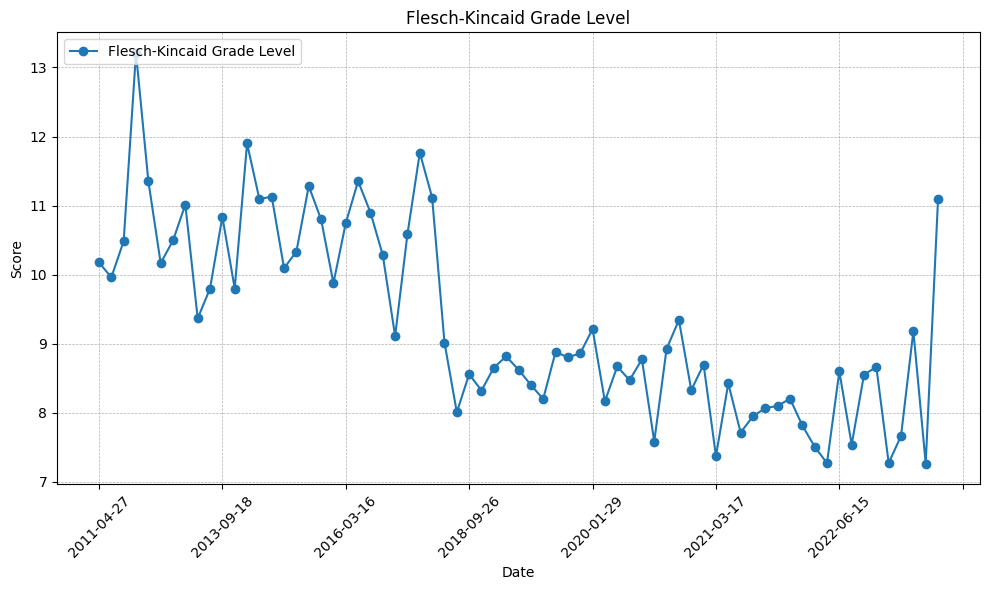

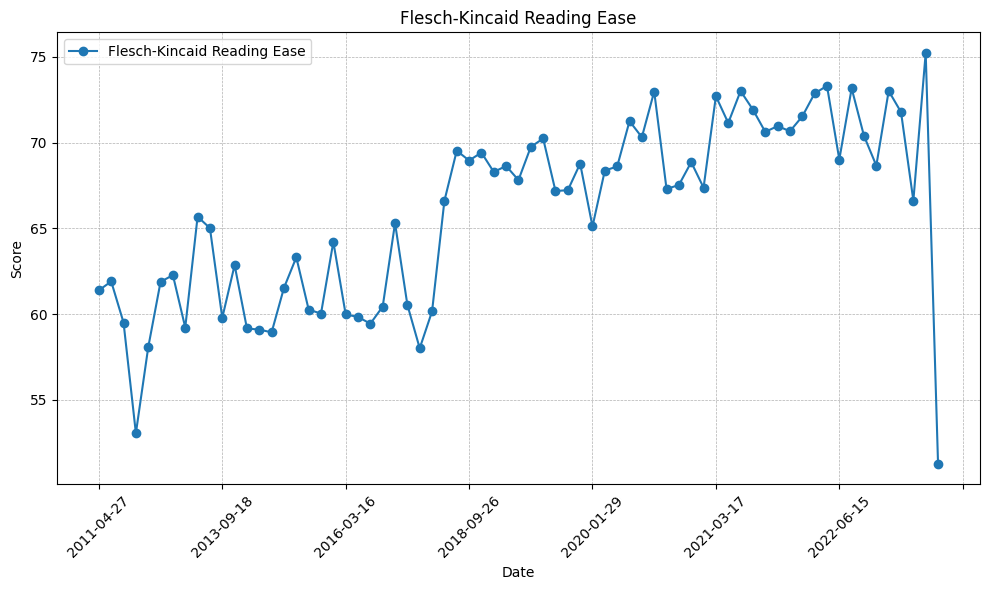

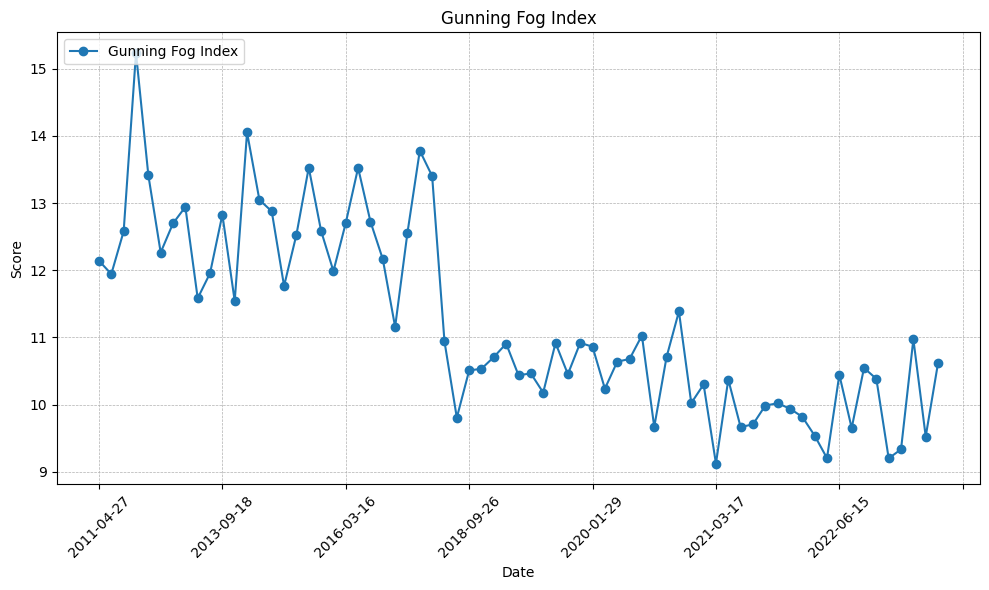

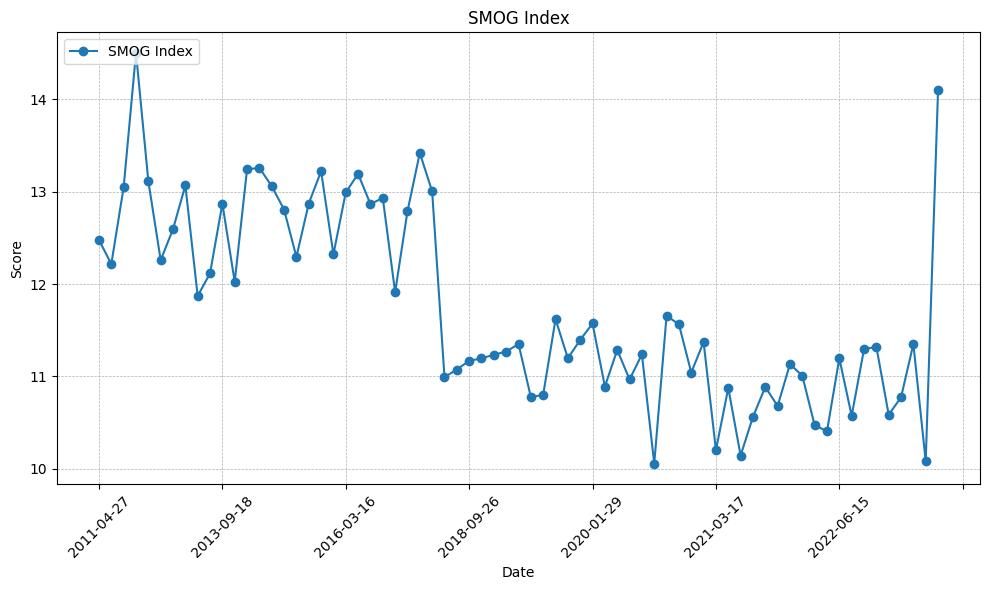

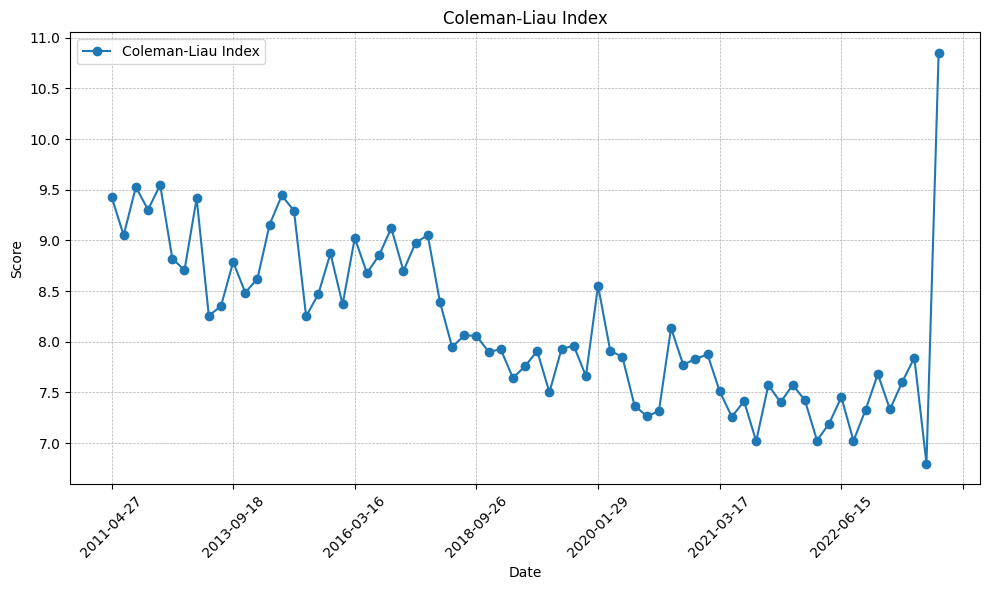

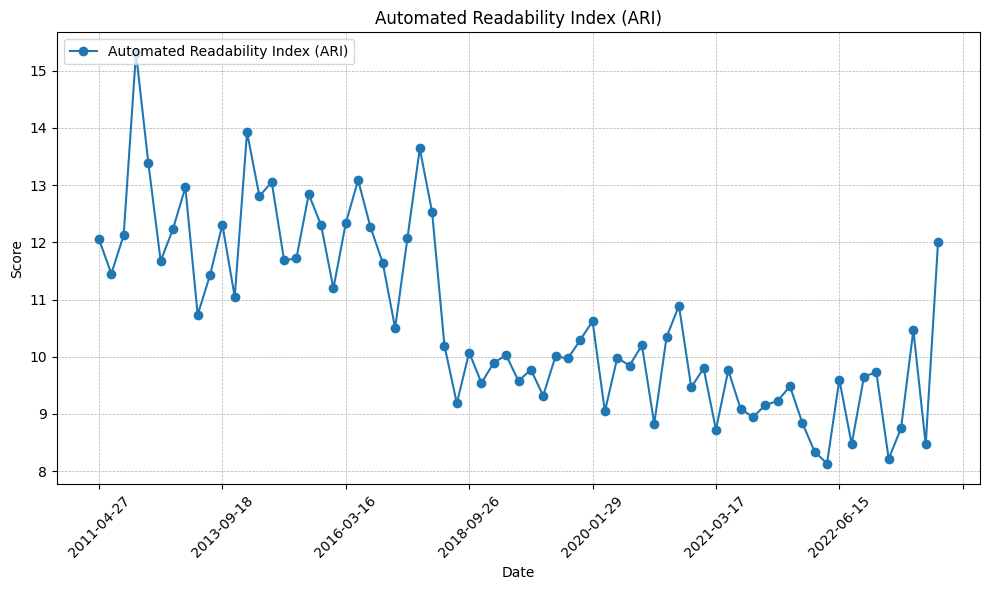

In [16]:
# Group by date and aggregate
aggregated = df.groupby('date').mean()


metrics = ["Flesch-Kincaid Grade Level", "Flesch-Kincaid Reading Ease", "Gunning Fog Index", "SMOG Index", "Coleman-Liau Index", "Automated Readability Index (ARI)"]

for metric in metrics:
    aggregated[metric].plot(kind='line', marker='o', figsize=(10, 6))
    
    plt.title(metric)
    plt.xlabel("Date")
    plt.ylabel("Score")
    plt.xticks(rotation=45)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.legend(loc="upper left")
    plt.show()



In [15]:
df.head()

,Unnamed: 0,date,source,full_text,title,chairman,variable,segment_text,segment,Flesch-Kincaid Grade Level,Flesch-Kincaid Reading Ease,Gunning Fog Index,SMOG Index,Coleman-Liau Index,Automated Readability Index (ARI)
0,0,2011-04-27,fed_reserve,"April 27, 2011 Chairman Bernanke’s Press Confe...",Press Conference Transcript,Ben S. Bernanke,fomc_presconf,"April 27, 2011 Chairman Bernanke’s Press Confe...",opening_remark,13.2,40.38,12.49,15.6,12.71,14.5
1,1,2011-04-27,fed_reserve,"April 27, 2011 Chairman Bernanke’s Press Confe...",Press Conference Transcript,Ben S. Bernanke,fomc_presconf,"UNIDENTIFIED SPEAKER. Mr. Chairman, tomorrow ...",qa_pair1,9.9,65.15,12.36,11.7,9.41,12.3
2,2,2011-04-27,fed_reserve,"April 27, 2011 Chairman Bernanke’s Press Confe...",Press Conference Transcript,Ben S. Bernanke,fomc_presconf,"UNIDENTIFIED SPEAKER. Mr. Chairman, given wha...",qa_pair2,11.4,55.68,13.22,13.6,10.51,13.8
3,3,2011-04-27,fed_reserve,"April 27, 2011 Chairman Bernanke’s Press Confe...",Press Conference Transcript,Ben S. Bernanke,fomc_presconf,"UNIDENTIFIED SPEAKER. Mr. Chairman, first, th...",qa_pair3,9.7,60.24,11.29,12.3,9.17,10.6
4,4,2011-04-27,fed_reserve,"April 27, 2011 Chairman Bernanke’s Press Confe...",Press Conference Transcript,Ben S. Bernanke,fomc_presconf,"UNIDENTIFIED SPEAKER. I’m sorry, Mr. Chairman...",qa_pair4,8.8,67.99,11.03,10.8,8.47,10.5


In [17]:
df1 = df[["date","segment","Flesch-Kincaid Grade Level", "Flesch-Kincaid Reading Ease", "Gunning Fog Index", "SMOG Index", "Coleman-Liau Index", "Automated Readability Index (ARI)"]]
df1.to_csv('df_complexity.csv')

In [18]:
df1.tail()

,date,segment,Flesch-Kincaid Grade Level,Flesch-Kincaid Reading Ease,Gunning Fog Index,SMOG Index,Coleman-Liau Index,Automated Readability Index (ARI)
1271,2023-05-03,qa_pair17,9.5,66.07,11.44,11.4,7.49,10.6
1272,2023-05-03,qa_pair18,7.7,70.84,9.87,10.7,6.90,8.2
1273,2023-05-03,qa_pair19,6.0,86.03,9.12,8.7,5.28,7.6
1274,2023-05-03,qa_pair20,5.5,81.83,7.77,9.4,5.85,6.5
1275,2023-06-14,opening_remark,11.1,51.28,10.62,14.1,10.85,12.0
